# HOURSE PRICE PREDICTION USING_LINEAR_REGRESSION

<h2 id="1.Introduction">1.Introduction</h2>

In [1]:
from IPython.display import Image
import os
!ls ../input/housing-price

Median_and_Average_Sales_Prices_of_New_Homes_Sold_in_the_US_1963-2010_Monthly.png


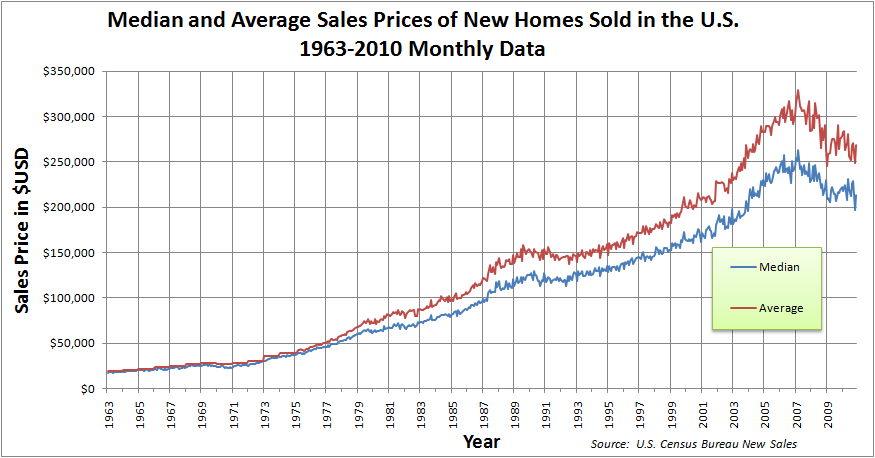

In [2]:
Image("/kaggle/input/housing-price/Median_and_Average_Sales_Prices_of_New_Homes_Sold_in_the_US_1963-2010_Monthly.png")

Housing prices include housing rent prices indices, real and nominal house prices indices, and ratios of price to rent and price to income. In most cases, the nominal house price index covers the sales of newly-built and existing dwellings, following the recommendations from the RPPI (Residential Property Prices Indices) manual. The real house price index is given by the ratio of the nominal house price index to the consumers’ expenditure deflator in each country from the OECD national accounts database. Both indices are seasonally adjusted. The price to income ratio is the nominal house price index divided by the nominal disposable income per head and can be considered as a measure of affordability. The price to rent ratio is the nominal house price index divided by the housing rent price index and can be considered as a measure of the profitability of house ownership. The price to income and price to rent ratios are indices with base year 2015.m

<h3 id="1.1 Load Libraries">1.1 Load Libraries</h3>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("/kaggle/input/housing/housing.csv")

- Check Data

In [5]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3 id="1.2 Desciptive Statistic">1.2 Desciptive Statistic</h3>

In [6]:
# Descriptive Statistic
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Checking type of DataFrame** 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Delete Na in DataFrame
df.dropna(inplace=True)
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [9]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [10]:
# Count of columns and row in DataFrame
df.shape

(20433, 10)

<h2 id="2. Data Preprocessing and EDA">2. Data Preprocessing and EDA</h2>

<h3 id="2.1 Exploratory Data Analysis (EDA)">2.1 Exploratory Data Analysis (EDA)</h3>

**Histogram show categoricak variable**

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

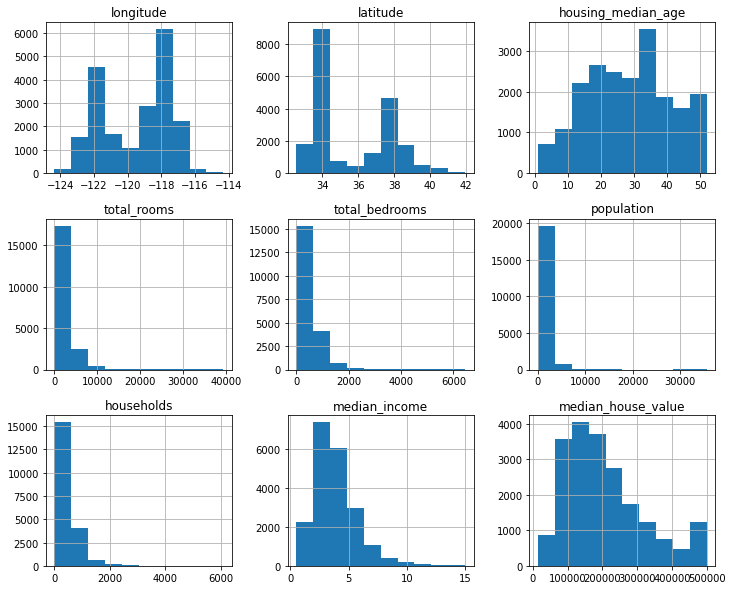

In [11]:
df.hist(figsize=(12,10))

In [12]:
## Covariance matrix for categorical variable
hm=df.corr()
hm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Figure size 864x504 with 0 Axes>

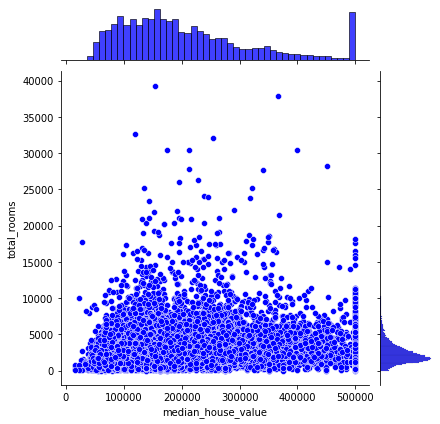

In [13]:
# Distribution between housing_price_madien_age with total_rooms
plt.figure(figsize=(12,7))
sns.jointplot(x="median_house_value",y="total_rooms",data=df,color='blue')

**Distribution of Median_house_value**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The graph shows the distribution of (median_house_value)')

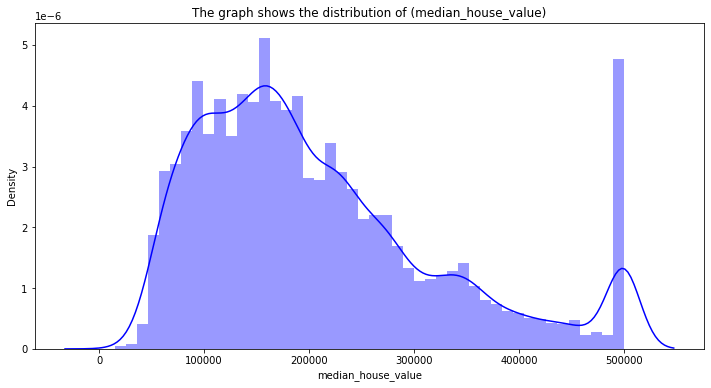

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(df['median_house_value'],color='blue')
plt.title("The graph shows the distribution of (median_house_value)")

**Distribution of population**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The graph shows the distribution of (population)')

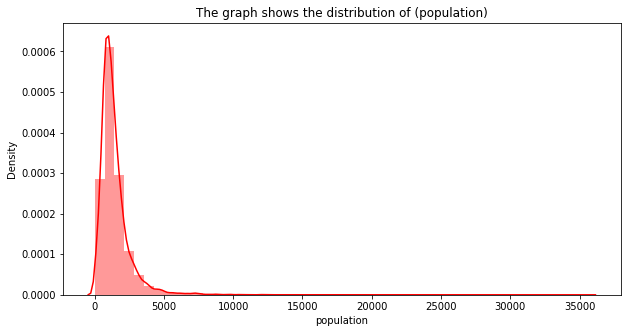

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df['population'],color='red')
plt.title("The graph shows the distribution of (population)")

**Distibution of median_income**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The graph shows the distribution of (median_income)')

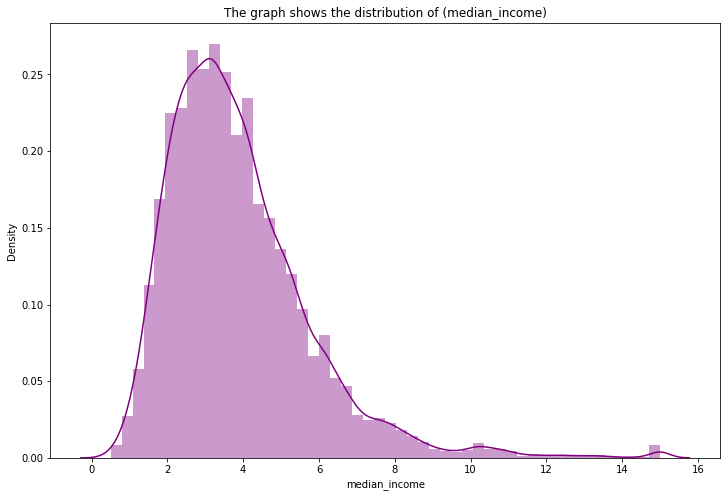

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(df['median_income'],color="purple")
plt.title("The graph shows the distribution of (median_income)")

**Median house value by latitude and longitude**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

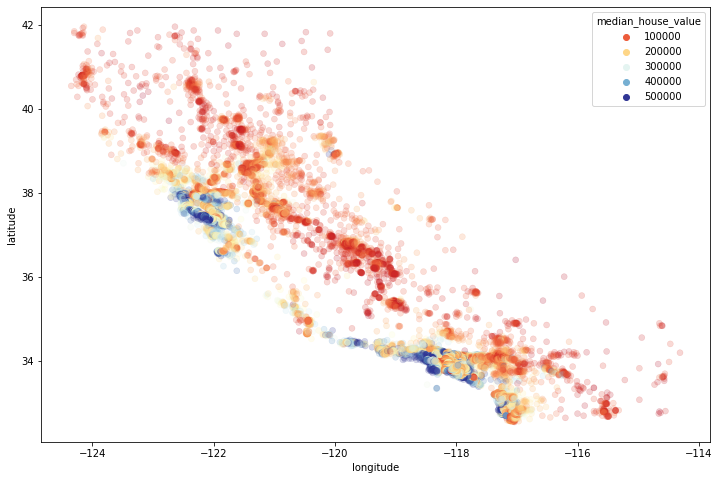

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="longitude",y="latitude",data=df,
               hue='median_house_value',edgecolor=None,
               alpha=0.2,palette='RdYlBu')

**Count the number of houses by ocean_proximity**

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

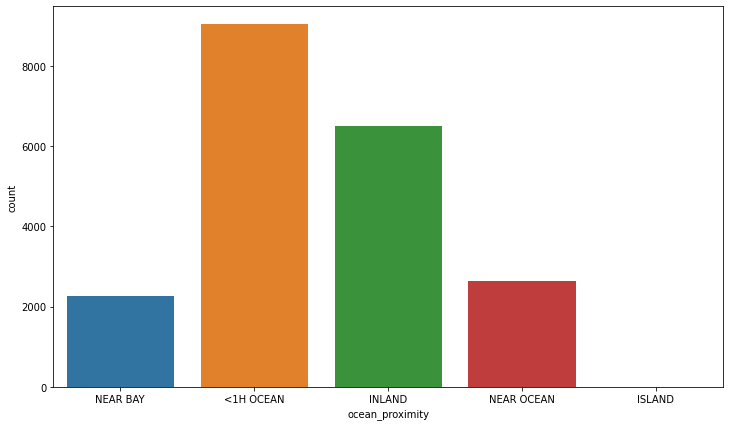

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['ocean_proximity'])

<Figure size 864x504 with 0 Axes>

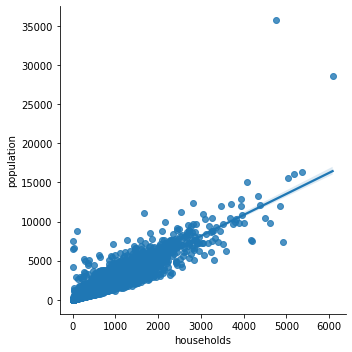

In [19]:
plt.figure(figsize=(12,7))
sns.lmplot(data=df,x='households',y='population',palette="Set2")

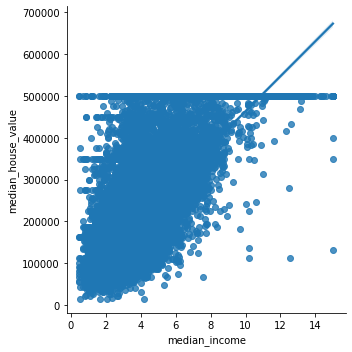

In [20]:
sns.lmplot(data=df,x="median_income",y="median_house_value",palette="Set2")

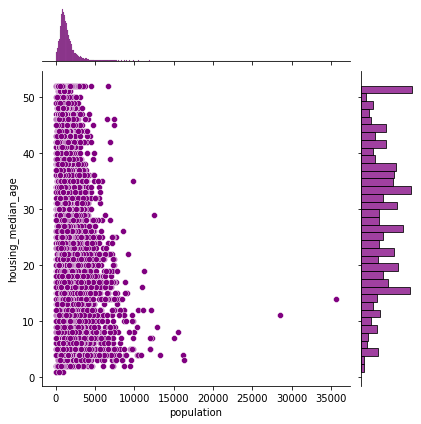

In [21]:
sns.jointplot(data=df,x="population",y='housing_median_age',color="purple")

**Distribution of (population)**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The graph shows the distribution of (population)')

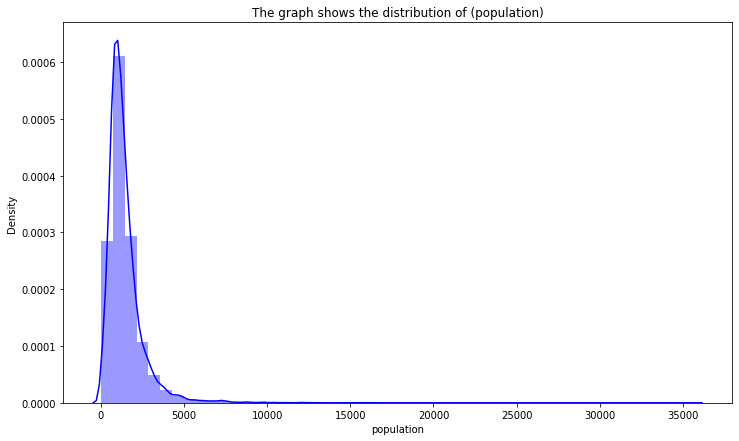

In [22]:
plt.figure(figsize=(12,7))
sns.distplot(df['population'],color='blue')
plt.title("The graph shows the distribution of (population)")

<AxesSubplot:>

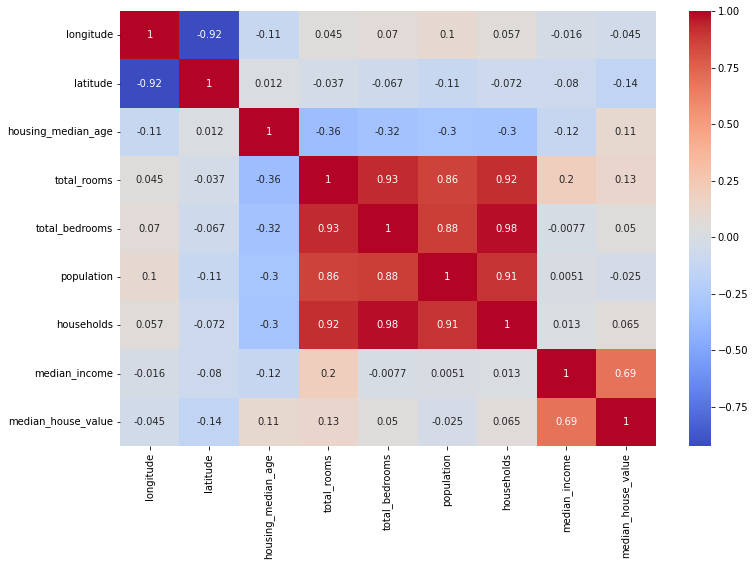

In [23]:
hm=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(hm,annot=True,cmap='coolwarm')

**Sort by median_house_value**

In [24]:
 df.corr()['median_house_value'].sort_values()

latitude             -0.144638
longitude            -0.045398
population           -0.025300
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [25]:
df.sort_values("median_house_value",ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8852,-118.42,34.08,48.0,2413.0,261.0,770.0,248.0,15.0001,500001.0,<1H OCEAN
10454,-117.66,33.48,22.0,809.0,180.0,334.0,157.0,2.3846,500001.0,<1H OCEAN
5487,-118.50,33.97,29.0,2737.0,808.0,1157.0,696.0,5.1280,500001.0,<1H OCEAN
16020,-122.47,37.73,50.0,1653.0,252.0,641.0,224.0,10.6605,500001.0,NEAR OCEAN
16019,-122.47,37.73,52.0,2151.0,280.0,762.0,274.0,10.7309,500001.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND


In [26]:
df['total_rooms']=np.log(df['total_rooms']+1)
df['total_bedrooms']=np.log(df['total_bedrooms']+1)
df['population']=np.log(df['population']+1)
df['households']=np.log(df['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

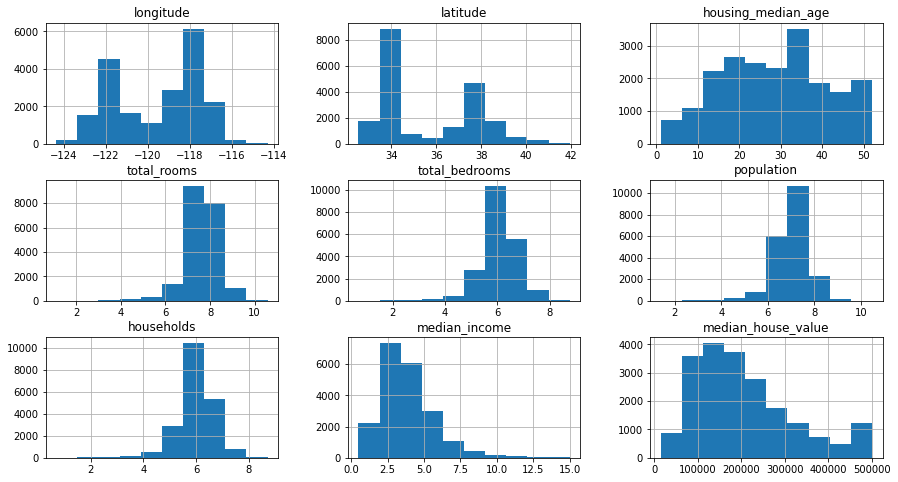

In [27]:
df.hist(figsize=(15,8))

**Count values type of ocean_proximity**


In [28]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

- Create dumies

In [29]:
df=df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [30]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


- Covariance matrix chart

<AxesSubplot:>

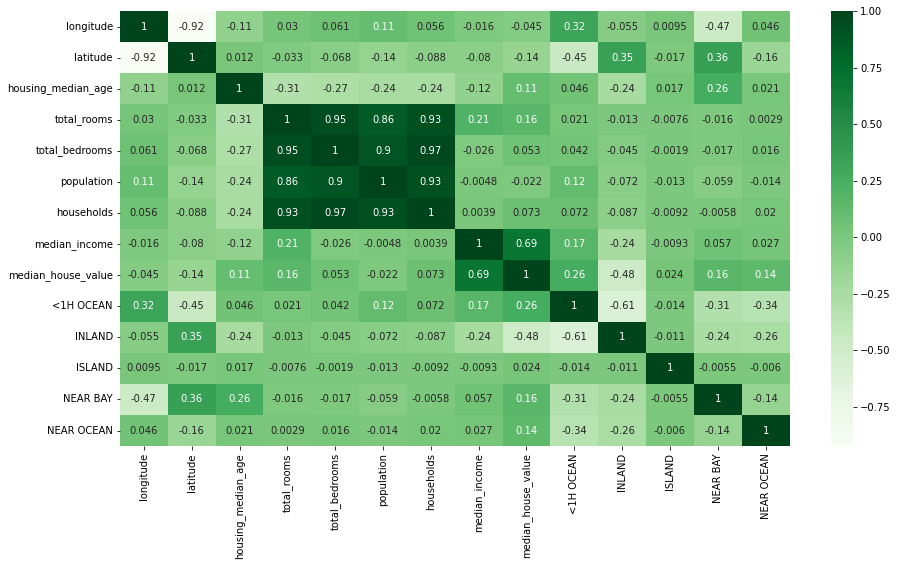

In [31]:

hm=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(hm,annot=True,cmap="Greens")

**Median Income by latitude and longitude**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

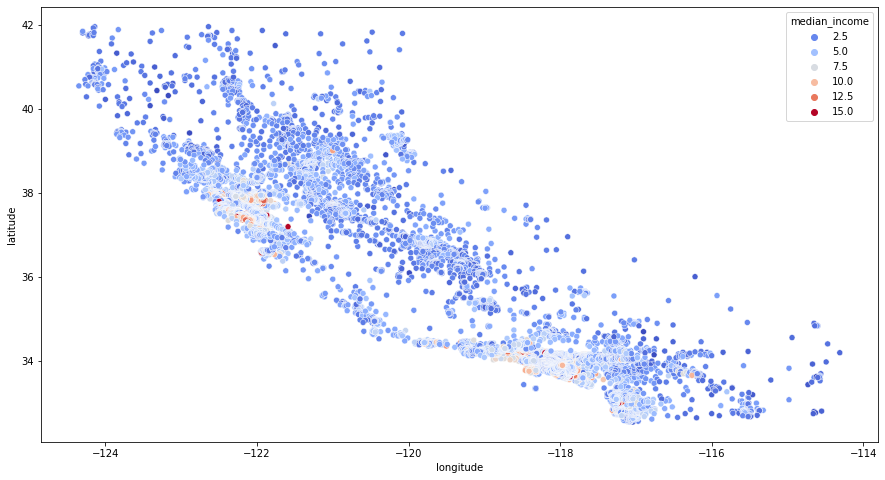

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude",y='latitude',data=df,hue="median_income",palette="coolwarm")

<h2 id="2.2 Feature Engineering">2.2 Feature Engineering</h2>

In [33]:
df['bedroom_ratio']=df['total_bedrooms']/df['total_rooms']
df['household_room']=df['total_bedrooms']/df['households']

<AxesSubplot:>

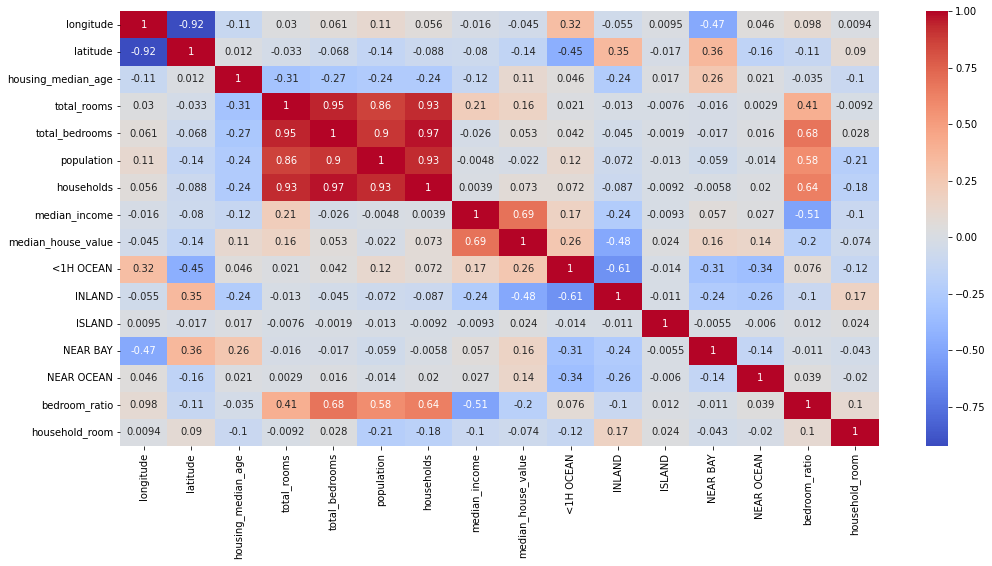

In [34]:
hm=df.corr()
plt.figure(figsize=(17,8))
sns.heatmap(hm,annot=True,cmap="coolwarm")

<h2 id="3.Training Model">3. Training Model</h2>

In [35]:
from sklearn.model_selection import train_test_split
X=df.drop(['median_house_value'],axis=1)
y=df["median_house_value"]

In [36]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.004820
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,0.995951
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.013603
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.013016
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.013968


In [37]:
y.head(5)


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm=LinearRegression()

In [41]:
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.004820
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,0.995951
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.013603
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.013016
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.013968


In [43]:
# Intercept
print(lm.intercept_)

-1991820.42008236


In [44]:
# Coefficient
lm.coef_

array([ -29040.76189024,  -28318.15753854,    1122.10419974,
        -84069.88928074,  155878.76164672,  -87946.28924236,
         33013.94685781,   42302.22570722,  -23410.25865652,
        -56658.40214892,  138245.44086145,  -32669.06240979,
        -25507.71764622, -331471.43207123,  -44077.0053936 ])

In [45]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
longitude,-29040.761890
latitude,-28318.157539
housing_median_age,1122.104200
total_rooms,-84069.889281
total_bedrooms,155878.761647
population,-87946.289242
households,33013.946858
median_income,42302.225707
<1H OCEAN,-23410.258657
INLAND,-56658.402149


<h2 id="4. Predictions">4. Predictions</h2>

In [46]:
predictions=lm.predict(X_test)

In [47]:
predictions# This is the estimated price of the house

array([231687.87263716, 149623.05065158, 209914.23067903, ...,
       221334.51180379, 145072.9140777 , 294483.39630503])

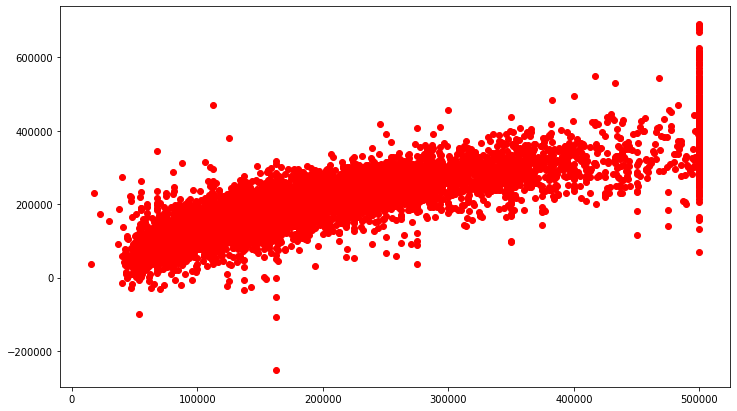

In [48]:
plt.figure(figsize=(12,7))
plt.scatter(y_test,predictions,color="red")# when it lines up in a straight line this is a
                                            # pretty good prediction

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

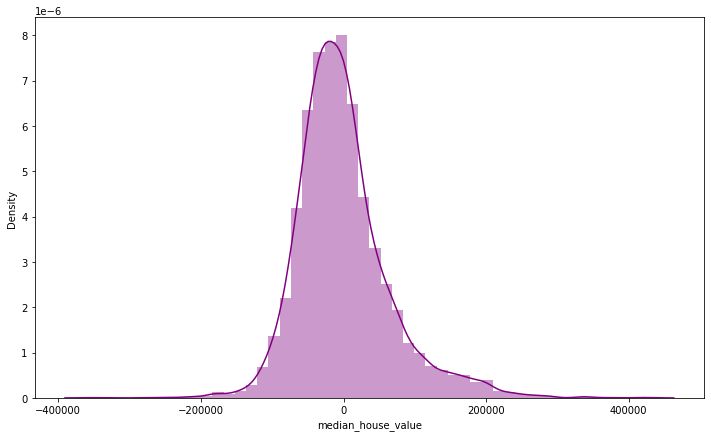

In [49]:
plt.figure(figsize=(12,7))
sns.distplot((y_test-predictions),color="purple")
# The remainder is normally distributed as this proves
# correct prediction
# If the distribution is not normal, we may have gone wrong at some point

In [50]:
y_test

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
17373    162900.0
14698    177700.0
7826     225800.0
2581     150000.0
8704     314100.0
Name: median_house_value, Length: 6743, dtype: float64

<h2 id="5. Evaluation">5. Evaluation</h2>

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_absolute_error(y_test,predictions)

47725.760947714916

In [53]:
metrics.mean_squared_error(y_test,predictions)

4273457213.373962

In [54]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

65371.68510428626